https://www.kaggle.com/trolukovich/predicting-pokemon-with-cnn-and-keras <hr>

In [2]:
import numpy as np
import pandas as pd
#import cv2 as cv
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gc
import requests

from PIL import Image
from io import BytesIO

from collections import Counter
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical

warnings.filterwarnings('ignore')

C:\Users\theka\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


### Do some data exploration

In [4]:
path = 'D:/Experiments/data/pokemon-generation-one/dataset'
classes = os.listdir(path) # Return a list containig name of file in dir
print(f'Total number of Pokemons {len(classes)}')

Total number of Pokemons 150


In [6]:
# Dictionary that contain class and number of Images in that class
counts = {}
for c in classes:
    counts[c] = len(os.listdir(os.path.join(path, c)))
    
print(f'Total number of images in dataset: {sum(list(counts.values()))}')

Total number of images in dataset: 10842


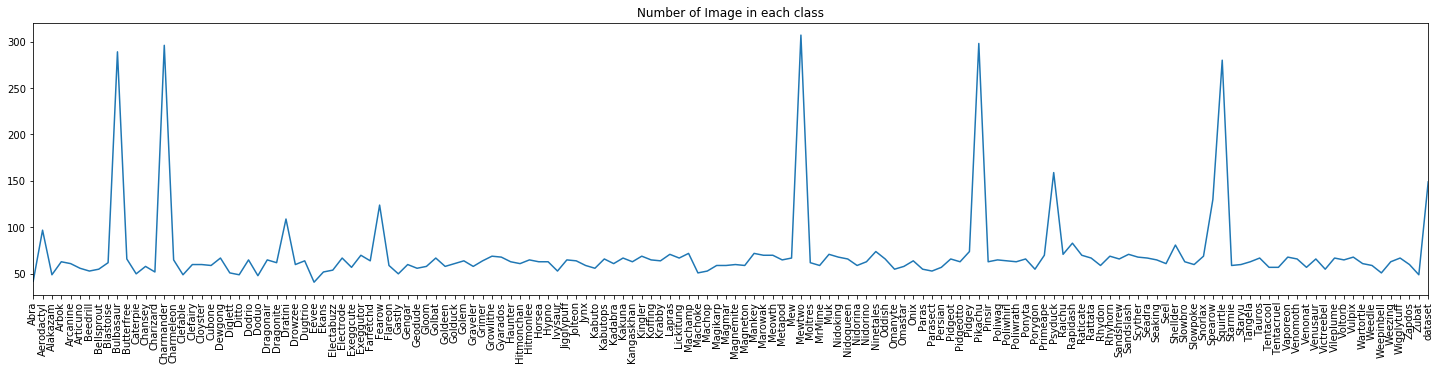

In [14]:
# Number of Image in each class plot
fig = plt.figure(figsize = (25, 5))
sns.lineplot(x = list(counts.keys()), y = list(counts.values())).\
set_title('Number of Image in each class')
plt.xticks(rotation = 90)
plt.margins(x = 0)
plt.show()

A bit imbalance right ?

In [16]:
# Sort out 7 most image class
imbalanced = sorted(counts.items(), key = lambda x: x[1], reverse = True)[:7]
print(imbalanced)

[('Mewtwo', 307), ('Pikachu', 298), ('Charmander', 296), ('Bulbasaur', 289), ('Squirtle', 280), ('Psyduck', 159), ('dataset', 149)]


In [29]:
sorted(counts.items(), key = lambda x: x[1], reverse = True)

[('Mewtwo', 307),
 ('Pikachu', 298),
 ('Charmander', 296),
 ('Bulbasaur', 289),
 ('Squirtle', 280),
 ('Psyduck', 159),
 ('dataset', 149),
 ('Spearow', 130),
 ('Fearow', 124),
 ('Dratini', 109),
 ('Aerodactyl', 97),
 ('Rapidash', 83),
 ('Shellder', 81),
 ('Ninetales', 74),
 ('Pidgey', 74),
 ('Machamp', 72),
 ('Mankey', 72),
 ('Lapras', 71),
 ('Muk', 71),
 ('Raichu', 71),
 ('Sandslash', 71),
 ('Exeggutor', 70),
 ('Marowak', 70),
 ('Meowth', 70),
 ('Primeape', 70),
 ('Raticate', 70),
 ('Growlithe', 69),
 ('Kingler', 69),
 ('Rhyhorn', 69),
 ('Snorlax', 69),
 ('Gyarados', 68),
 ('Nidoking', 68),
 ('Scyther', 68),
 ('Vaporeon', 68),
 ('Vulpix', 68),
 ('Dewgong', 67),
 ('Electrode', 67),
 ('Golbat', 67),
 ('Kakuna', 67),
 ('Lickitung', 67),
 ('Mew', 67),
 ('Rattata', 67),
 ('Seadra', 67),
 ('Tauros', 67),
 ('Vileplume', 67),
 ('Wigglytuff', 67),
 ('Butterfree', 66),
 ('Kabutops', 66),
 ('Nidoqueen', 66),
 ('Oddish', 66),
 ('Pidgeot', 66),
 ('Ponyta', 66),
 ('Sandshrew', 66),
 ('Venomoth', 66)

In [30]:
# What is dataset = 149 ?
# so I check it it a bit redundant folder so let remove it

In [38]:
pk_list = sorted(counts.items(), key = lambda x: x[1], reverse = True)
del pk_list[6]

In [42]:
imbalanced = pk_list[:7]
print(imbalanced)

[('Mewtwo', 307), ('Pikachu', 298), ('Charmander', 296), ('Bulbasaur', 289), ('Squirtle', 280), ('Psyduck', 159), ('Spearow', 130)]


In [46]:
imbalanced = [i[0] for i in imbalanced]

In [ ]:
# time to read all images and add them to list:
X = []
y = []

# Loop through all classes
for c in classes:
    #take only classes that defined in imbalanced list
    if c in imbalanced:
        dir_path = os.path.join(path, c)
        label = imbalanced.index(c)
        
        # Reading, Resizing and adding image and labels to lists.
        for i in os.listdir(dir_path):
            image = cv.imread(os.path.join(dir_path, 1))
            
            try:
                resized = cv.resize(image, (96, 96)) # Resizing image to (96, 96)
                X.append(resized)
                y.append(label)
                
            except:
                print(os.path.join(dir_path, i), '[Error]')